In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import re

In [3]:
# Loading a CSV file into a Pandas DataFrame named dataset. Then, Creating another DataFrame df based on the dataset
dataset = pd.read_csv("/content/Dataset-SA.csv")
df = pd.DataFrame(dataset)

In [4]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [6]:
dataset.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


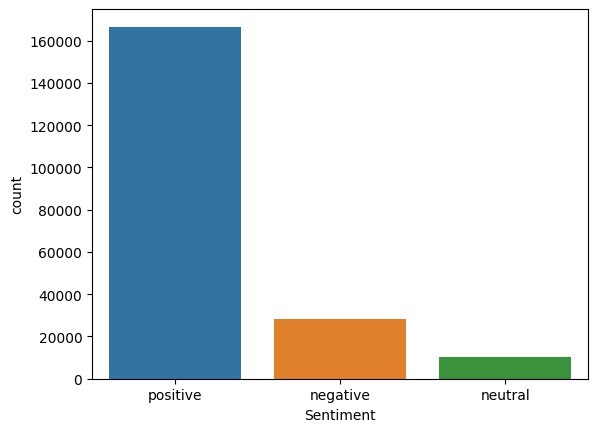

In [7]:
# Creating a bar plot showing the count of occurrences of each category in the Sentiment column from dataset
barPlot = sn.countplot(x = 'Sentiment', data = dataset)

In [8]:
# Filtering out rows with 'neutral' sentiment from the 'Sentiment' column in the dataset
dataset = dataset[dataset.Sentiment.isin(['neutral']) == False]
df = pd.DataFrame(dataset)

In [9]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
...,...,...,...,...,...,...
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive


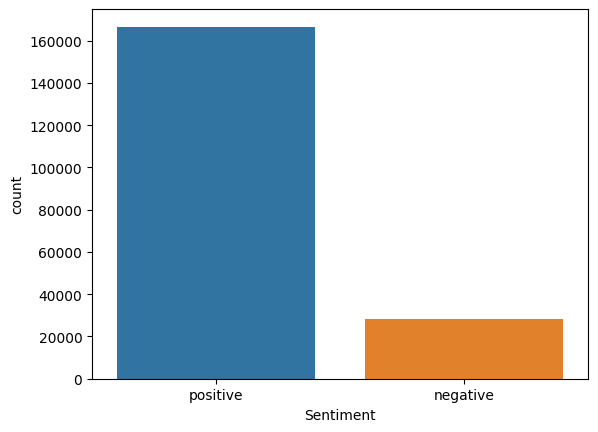

In [10]:
# Creating a bar plot showing the count of occurrences of each category in the Sentiment column from dataset
barPlot = sn.countplot(x = 'Sentiment', data = dataset)

In [11]:
# Calculating count of unique values in the Sentiment column
dataset['Sentiment'].value_counts()

positive    166581
negative     28232
Name: Sentiment, dtype: int64

In [12]:
# Filling missing (NaN) values in each column with the most frequent value for that column
df = df.fillna(df.mode().iloc[0])
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive


In [13]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194813 entries, 0 to 205050
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   194813 non-null  object
 1   product_price  194813 non-null  object
 2   Rate           194813 non-null  object
 3   Review         194813 non-null  object
 4   Summary        194813 non-null  object
 5   Sentiment      194813 non-null  object
dtypes: object(6)
memory usage: 10.4+ MB


In [14]:
# Initializing an instance
count_vectorizer = CountVectorizer()

In [15]:
# Tokenizing the text, building the vocabulary, and generating a list of unique words found in the reviews
feature_vector = count_vectorizer.fit(data.Review)

In [16]:
features = feature_vector.get_feature_names_out()

In [17]:
print("Total number of features: ", len(features))

Total number of features:  1257


In [18]:
# Transforming text data in Review column into a matrix of token counts
data_features = count_vectorizer.transform(data.Review)

In [19]:
data_features.shape

(194813, 1257)

In [20]:
# Counting total of non-zero elements in the transformed sparse matrix
data_features.getnnz()

359542

In [21]:
print("Density of the matrix: ", data_features.getnnz()*100 / (data_features.shape[0]* data_features.shape[1]))

Density of the matrix:  0.1468237857832545


Approx 15% of the elements in the transformed matrix are non-zero.

In [22]:
# Converting the sparse matrix into a dense matrix representation.
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features

In [23]:
data[0:1]

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive


In [24]:
data_df.iloc[:1,150:157]

,beware,beyond,big,biggest,billion,bishnu,bit
0,0,0,0,0,0,0,0


In [25]:
# total count of occurrences for each feature across all in the dataset
features_counts = np.sum(data_features.toarray(), axis = 0)
features_counts_df = pd.DataFrame(dict(features = features , counts = features_counts))

In [26]:
features_counts_df

,features,counts
0,10,3
1,100,3
2,10k,1
3,10mins,1
4,11,4
...,...,...
1252,you,21
1253,your,1145
1254,yr,1
1255,zero,1


Text(0, 0.5, 'Density')

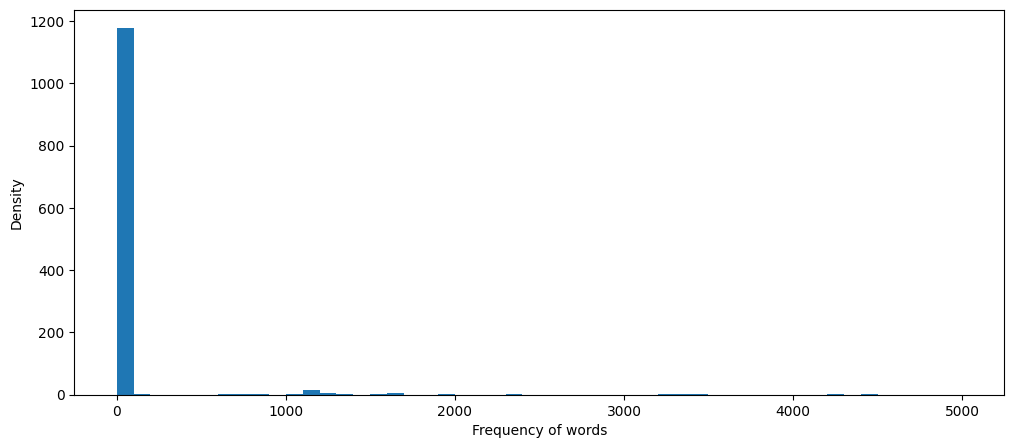

In [27]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts , bins=50 , range = (0 ,5000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [28]:
# Count of unique features that occur only once across the entire dataset.
len(features_counts_df[features_counts_df.counts == 1])

680

In [29]:
# Maximum number of features to be considered
count_vectorizer = CountVectorizer(max_features=10000)

In [30]:
feature_vector = count_vectorizer.fit(data.Review)

In [31]:
features = feature_vector.get_feature_names_out()

In [32]:
data_features = count_vectorizer.transform(data.Review)

In [33]:
features_counts = np.sum(data_features.toarray() , axis = 0)

In [34]:
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))

In [35]:
feature_counts.sort_values('counts',ascending = False)[0:15]

,features,counts
1227,wonderful,32043
882,product,28478
494,good,16158
110,awesome,11073
773,not,10860
892,purchase,10779
1105,terrific,10773
1110,the,10496
737,money,8866
1237,worth,8788


In [36]:
nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
data['Review'][0:5]

0             super!
1            awesome
2               fair
3    useless product
5            awesome
Name: Review, dtype: object

In [38]:
# Filtering out stopwords during the tokenization and counting process.
count_vectorizer = CountVectorizer(stop_words=english_stop_words , max_features = 10000)

In [39]:
feature_vector = count_vectorizer.fit(data.Review)

In [40]:
data_features = count_vectorizer.transform(data.Review)

In [41]:
features = feature_vector.get_feature_names_out()

In [42]:
features_counts = np.sum(data_features.toarray() , axis=0)

In [43]:
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))

In [44]:
feature_counts.sort_values("counts",ascending = False)[0:15]

,features,counts
1145,wonderful,32043
824,product,28478
461,good,16158
99,awesome,11073
834,purchase,10779
1042,terrific,10773
694,money,8866
1155,worth,8788
721,nice,8652
986,specified,7850


In [45]:
stemmer = PorterStemmer()

In [46]:
analyzer = CountVectorizer().build_analyzer()

In [47]:
# Returning a list of stemmed words
def stemmed_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop_words = [word for word in stemmed_words ]
  return non_stop_words

In [48]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words , max_features = 10000)

In [49]:
feature_vector = count_vectorizer.fit(data.Review)

In [50]:
data_features = count_vectorizer.transform(data.Review)

In [51]:
features = feature_vector.get_feature_names_out()

In [52]:
features_counts = np.sum(data_features.toarray() , axis=0)

In [53]:
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))

In [54]:
feature_counts.sort_values("counts",ascending = False)[0:15]

,features,counts
1107,wonder,32045
798,product,28479
450,good,16158
107,awesom,11073
699,not,10860
806,purchas,10780
996,terrif,10773
1000,the,10496
665,money,8866
1114,worth,8789


In [55]:
data_df = pd.DataFrame(data_features.todense())

In [56]:
data_df.columns = features

In [57]:
data_df['Sentiment'] = data.Sentiment

In [58]:
X_train , X_test , Y_train , Y_test = train_test_split(data_features, data.Sentiment, test_size=0.2, random_state=42)

In [59]:
nb_clf1 = BernoulliNB()
nb_clf1.fit(X_train.toarray(),Y_train)

BernoulliNB()

In [60]:
test_predicted = nb_clf1.predict(X_test.toarray())

In [61]:
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.91      0.66      0.76      5690
    positive       0.94      0.99      0.97     33273

    accuracy                           0.94     38963
   macro avg       0.93      0.82      0.86     38963
weighted avg       0.94      0.94      0.94     38963



<Axes: >

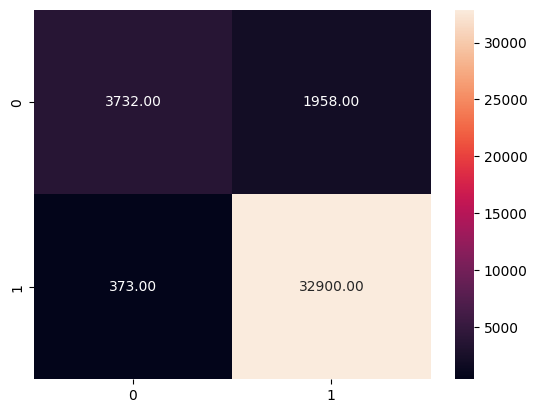

In [62]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [63]:
tfidf_vectorizer = TfidfVectorizer(analyzer = stemmed_words , max_features = 10000)

In [64]:
feature_vector = tfidf_vectorizer.fit(data.Review)

In [65]:
data_features = tfidf_vectorizer.transform(data.Review)

In [66]:
features = feature_vector.get_feature_names_out()

In [67]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 94.01740112414342%


In [68]:
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)

In [69]:
nb_clf2 = GaussianNB()

In [70]:
nb_clf2.fit(X_train.toarray(),Y_train)

GaussianNB()

In [71]:
test_predicted = nb_clf2.predict(X_test.toarray())

In [72]:
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.15      1.00      0.25      5690
    positive       0.86      0.00      0.01     33273

    accuracy                           0.15     38963
   macro avg       0.50      0.50      0.13     38963
weighted avg       0.75      0.15      0.04     38963



<Axes: >

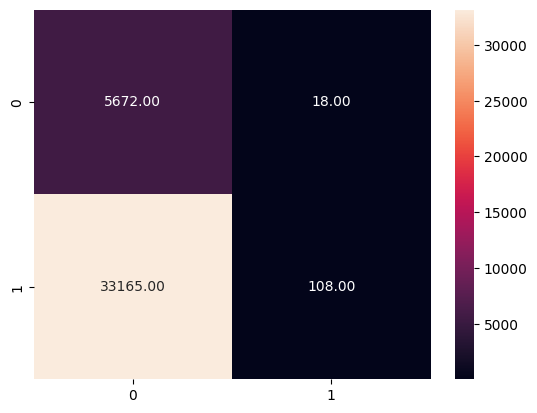

In [73]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [74]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 14.834586659138157%


In [75]:
stemmer = PorterStemmer()

In [76]:
def get_stemmed_tokens(doc):
  all_tokens = [word for word in nltk.word_tokenize(doc)]
  clean_tokens=[]
  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
        clean_tokens.append(each_token)
  stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
  return stemmed_tokens

In [77]:
tfidf_vectorizer = TfidfVectorizer(stop_words ='english' , max_features = 10000 , tokenizer=get_stemmed_tokens , ngram_range=(1,2))

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [79]:
feature_vector = tfidf_vectorizer.fit(data.Review)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

In [80]:
data_features = tfidf_vectorizer.transform(data.Review)

In [81]:
features = feature_vector.get_feature_names_out()

In [82]:
features

array(["'s", "'s envi", "'s excel", ..., 'zip dri', 'ð\x92ó\x99.valu',
       'ð\x92ó\x99.valu money'], dtype=object)

In [83]:
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.Sentiment,test_size=0.2,random_state=42)

In [84]:
nb_clf3 = BernoulliNB()

In [85]:
nb_clf3.fit(X_train.toarray(),Y_train)

BernoulliNB()

In [86]:
test_predicted = nb_clf3.predict(X_test.toarray())

In [87]:
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

    negative       0.90      0.62      0.73      5690
    positive       0.94      0.99      0.96     33273

    accuracy                           0.93     38963
   macro avg       0.92      0.80      0.85     38963
weighted avg       0.93      0.93      0.93     38963



<Axes: >

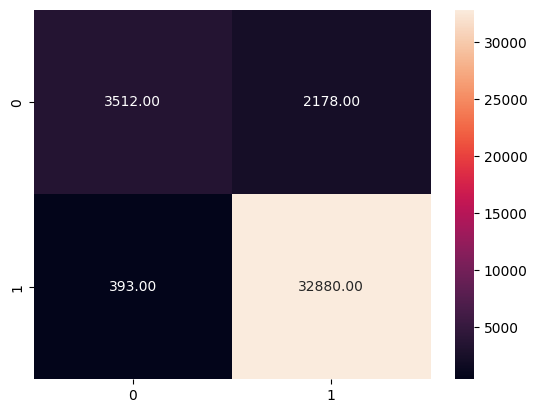

In [88]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [89]:
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,test_predicted)*100))

Accuracy of the model: 93.40143212791622%
